In [1]:
import matplotlib.pyplot as plt
import importlib
import main
importlib.reload(main)
from main import generate_network_connectivity, run_network_simulation, visualize_network, visualize_network_simulation2, mirror_sim
import numpy as np
from scipy.spatial import Voronoi
import colorcet
import tqdm
import scipy.io
import scipy.interpolate as scint
import time

## Isotropic Spiral

100%|██████████| 3000/3000 [00:48<00:00, 61.63it/s]


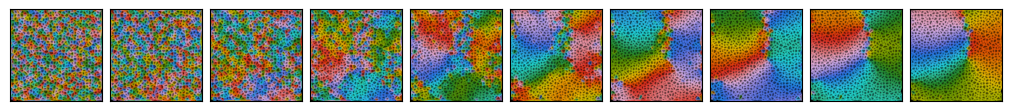

In [2]:
nacross = 32                                                                                                            # number of cells in row and column
W, r = generate_network_connectivity(Nacross=32, connectivity_type='uniform', sigma=1, Wscale=.5)                       # generate coupling weights (W) and 2d cell positions (r) 
psi_all, omega, psitimegrid_quad =  run_network_simulation(W, r, nacross*nacross, num_steps=3000, seed=31)              # simulate phase progression with Kuramoto iteration 
visualize_network_simulation2(psi_all, r, plot_every_n_frames=300,  save_path=None)                                     # visualize the above simulations for every 300 timesteps 

## Circular Spiral

100%|██████████| 3000/3000 [00:48<00:00, 61.90it/s]


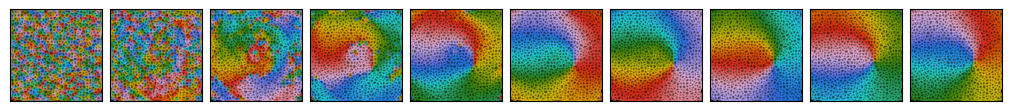

In [3]:
nacross = 32                                                                                                             # number of cells in row and column
W, r = generate_network_connectivity(Nacross=nacross, connectivity_type='circular_bias', sigma=50, Wscale=1)             # generate coupling weights (W) and 2d cell positions (r) 
psi_all, omega, psitimegrid_quad =  run_network_simulation(W, r, nacross*nacross, num_steps=3000, seed=31, noise=0)      # simulate phase progression with Kuramoto iteration 
visualize_network_simulation2(psi_all, r, plot_every_n_frames=300,  save_path=None)                                      # visualize the above simulations for every 300 timesteps 

## Mirror Spiral
- this simulation takes a while to run (5 minutes on Intel core i-7-8700k CPU, 32GB RAM)

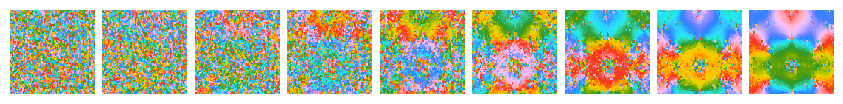

In [4]:
# set 2d-interpolation grid for saving later 
Ninside = 200
seed = 0
xin = np.linspace(-1,1, Ninside)
yin = np.linspace(0,1.5, int(Ninside))
Xpt, Ypt = np.meshgrid(xin,yin)
# start mirror symmetry simulation
psitime = mirror_sim(seed, Xpt,Ypt, mirror=True)

# plot results of mirror symmetry 
plot_every_n_frames = 1
psitime1  =psitime[:,:,1:10]
fig = plt.figure(figsize=(10,7.5), layout='constrained')
count1 = 1
for t in range(0, psitime1.shape[2], plot_every_n_frames):   
    ax = plt.subplot(1, 11, count1)
    ax.imshow(psitime1[:,:,t], cmap=colorcet.cm.CET_C6, vmin = 0, vmax=2*np.pi, interpolation = 'none')
    ax.axis('off')
    count1 += 1

plt.show()